In [393]:
import pandas as pd
import numpy as np

In [394]:
df = pd.read_csv('./Salary_dataset.csv')

df = df.iloc[:, 1:]

df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


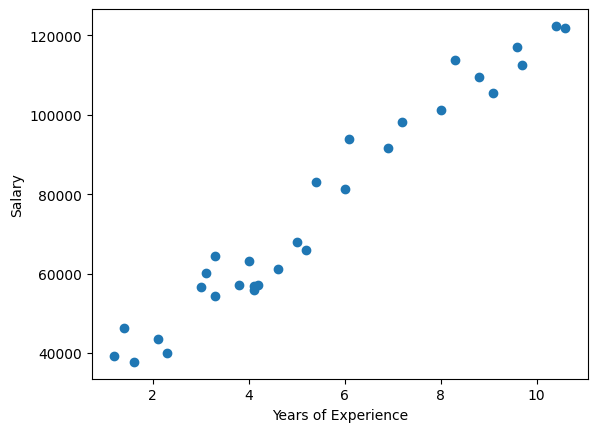

In [395]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [396]:
from sklearn.preprocessing import add_dummy_feature

X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

X = add_dummy_feature(X)
print(X)

[[ 1.   1.2]
 [ 1.   1.4]
 [ 1.   1.6]
 [ 1.   2.1]
 [ 1.   2.3]
 [ 1.   3. ]
 [ 1.   3.1]
 [ 1.   3.3]
 [ 1.   3.3]
 [ 1.   3.8]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.1]
 [ 1.   4.2]
 [ 1.   4.6]
 [ 1.   5. ]
 [ 1.   5.2]
 [ 1.   5.4]
 [ 1.   6. ]
 [ 1.   6.1]
 [ 1.   6.9]
 [ 1.   7.2]
 [ 1.   8. ]
 [ 1.   8.3]
 [ 1.   8.8]
 [ 1.   9.1]
 [ 1.   9.6]
 [ 1.   9.7]
 [ 1.  10.4]
 [ 1.  10.6]]


In [397]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

B = normal_equation(X, y)

print(B)

[24848.20396652  9449.96232146]


In [398]:
prediction = X.dot(B)

print(prediction)


[ 36188.15875227  38078.15121656  39968.14368085  44693.12484158
  46583.11730587  53198.09093089  54143.08716303  56033.07962732
  56033.07962732  60758.06078805  62648.05325234  63593.04948449
  63593.04948449  64538.04571663  68318.03064522  72098.0155738
  73988.00803809  75878.00050238  81547.97789525  82492.9741274
  90052.94398456  92887.932681   100447.90253816 103282.8912346
 108007.87239533 110842.86109176 115567.84225249 116512.83848464
 123127.81210966 125017.80457395]


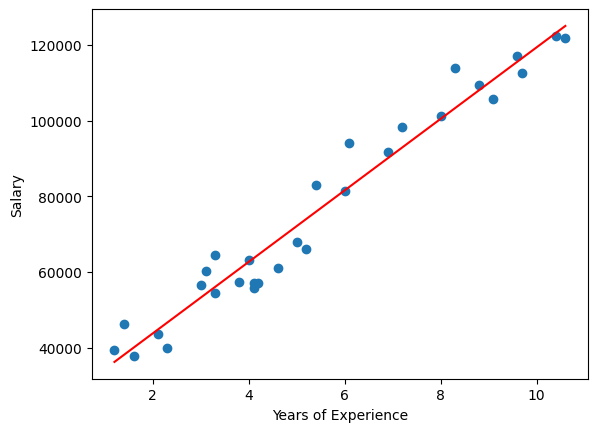

In [399]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(df['YearsExperience'], prediction, color='red')
plt.show()

In [400]:
pd.DataFrame({'Actual': y, 'Predicted': prediction})

,Actual,Predicted
0,39344.0,36188.158752
1,46206.0,38078.151217
2,37732.0,39968.143681
3,43526.0,44693.124842
4,39892.0,46583.117306
5,56643.0,53198.090931
6,60151.0,54143.087163
7,54446.0,56033.079627
8,64446.0,56033.079627
9,57190.0,60758.060788


In [401]:
alpha = 0.0001 # learning rate
epochs = 10000 # number of iterations

# initialize model params with random values
theta = np.random.randn(2)

print(theta)

[-0.06774543  1.57114522]


In [402]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    errors = []
    for _ in range(epochs):
        predictions = X.dot(theta)
        error = (1/m) * np.sum((predictions - y) ** 2)
        errors.append(error)

        theta0_partial = (2/m) * np.sum(predictions - y)
        theta1_partial = (2/m) * np.sum((predictions - y).dot(X))

        theta[0] = theta[0] - alpha * theta0_partial
        theta[1] = theta[1] - alpha * theta1_partial
    return theta, errors

theta, errors = gradient_descent(X, y, theta, alpha, epochs)

print(theta)

[ 8659.28860945 11903.12002083]


In [403]:
predictions = X.dot(theta)

print(predictions)

[ 22943.03263445  25323.65663862  27704.28064278  33655.8406532
  36036.46465737  44368.64867195  45558.96067403  47939.5846782
  47939.5846782   53891.14468862  56271.76869278  57462.08069487
  57462.08069487  58652.39269695  63413.64070528  68174.88871362
  70555.51271778  72936.13672195  80078.00873445  81268.32073653
  90790.8167532   94361.75275945 103884.24877612 107455.18478237
 113406.74479278 116977.68079903 122929.24080945 124119.55281153
 132451.73682611 134832.36083028]


In [404]:
pd.DataFrame({'Actual': y, 'Predicted': predictions})

,Actual,Predicted
0,39344.0,22943.032634
1,46206.0,25323.656639
2,37732.0,27704.280643
3,43526.0,33655.840653
4,39892.0,36036.464657
5,56643.0,44368.648672
6,60151.0,45558.960674
7,54446.0,47939.584678
8,64446.0,47939.584678
9,57190.0,53891.144689


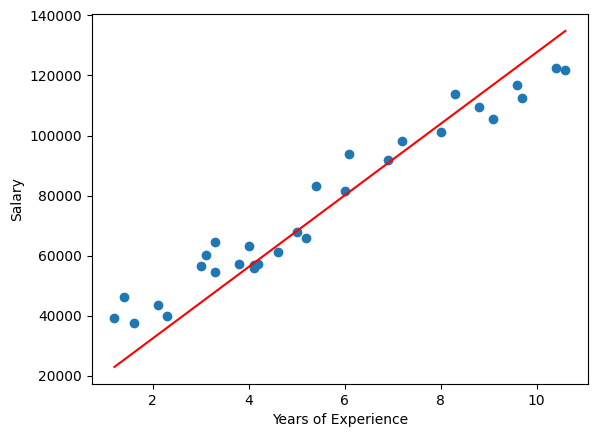

In [405]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(df['YearsExperience'], predictions, color='red')
plt.show()

86589042.23798329

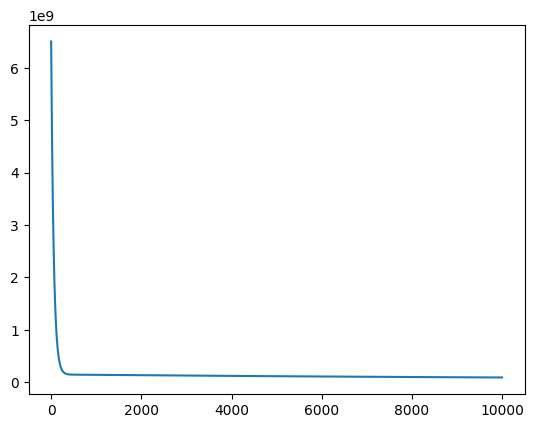

In [406]:
plt.plot(errors)

errors[-1]